In [1]:
import matplotlib
import pandas as pd
import glob

In [2]:
results_list = []
results = None

for fname in glob.glob('results/data_????-??-??T??_??_??.csv'):
    with open(fname) as f:
        results_list.append(pd.read_csv(f))

results = pd.concat(results_list)
del results_list

results

series                                browser      source  \
0    0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
1    0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
2    0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
3    0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
4    0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
..                ...                                    ...         ...   
155  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
156  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
157  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
158  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
159  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   

     iterations        experiment  type             expStart  \
0            20  BRZH8170D8WRR3DB     1  2023-06-16T10:14:18   
1            20  BRZH8170D8WRR3DB     1  2023-06-16T10:14:18   
2            20  BRZH8170D8WRR3DB     1  2023-06-16T10:14:18   
3            20  BRZH8170D8WRR3DB     1  2023-06-16T10:14:18   
4            20  BRZH8170D8WRR3DB     1  2023-06-16T10:14:18   
..          ...               ...   ...                  ...   
155          20  2S0JQAH8XB4MS1R5     2  2023-06-16T10:21:05   
156          20  2S0JQAH8XB4MS1R5     2  2023-06-16T10:21:05   
157          20  2S0JQAH8XB4MS1R5     2  2023-06-16T10:21:05   
158          20  2S0JQAH8XB4MS1R5     2  2023-06-16T10:21:05   
159          20  2S0JQAH8XB4MS1R5     2  2023-06-16T10:21:05   

              request  duration  
0    6A4XHED484YJGRAH      26.0  
1    MKKKW1D6F8T606KK      19.0  
2    4YJ1K1Y3ETKXFA7A      16.0  
3    2BGMR73H8YPBRMCT      13.0  
4    8WPZ6DNZZT6E6EHK      15.0  
..                ...       ...  
155  ASXF5BXSBBZ4SWJE     602.7  
156  42JA4JQNKMHQX4Z9     560.6  
157  KAZJ2F7Y6N3SMEKY     572.2  
158  W1DEKD45T56CQHP6     586.7  
159  2NRHDSAEGPK48NXC     543.6  

[320 rows x 9 columns]

In [25]:
experiments = set(results.experiment)

experimentTable = pd.DataFrame([
    pd.Series({
        'series':     data.iloc[0].series,
        'browser':    data.iloc[0].browser,
        'source':     data.iloc[0].source,
        'iterations': data.iloc[0].iterations,
        'experiment': data.iloc[0].experiment,
        'type':       data.iloc[0].type,
        'expStart':   data.iloc[0].expStart,
        'min':        data.duration.min(),
        'mean':       data.duration.mean(),
        'median':     data.duration.median(),
        'max':        data.duration.max()
    })
    for _, data in results.groupby('experiment')
]).sort_values('expStart', ignore_index=True).drop(columns=['expStart'])

experimentTable

series                                browser      source  \
0   0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
1   0DZR42Q5BQAQY4BZ           Firefox 102.0 on Linux amd64  small.html   
2   ATZGBZJMH6YP3X7D           Firefox 102.0 on Linux amd64    big.html   
3   ATZGBZJMH6YP3X7D           Firefox 102.0 on Linux amd64    big.html   
4   0Z4KREE4T82NWSQJ           Firefox 102.0 on Linux amd64  small.html   
5   0Z4KREE4T82NWSQJ           Firefox 102.0 on Linux amd64  small.html   
6   RNEKWACBEFE962NP           Firefox 102.0 on Linux amd64    big.html   
7   RNEKWACBEFE962NP           Firefox 102.0 on Linux amd64    big.html   
8   SYEMJTFBC6SVY6GZ  Chrome 114.0.0.0 on Linux 6.1.0 amd64  small.html   
9   SYEMJTFBC6SVY6GZ  Chrome 114.0.0.0 on Linux 6.1.0 amd64  small.html   
10  G7C53HA3NX6WG2R5  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
11  G7C53HA3NX6WG2R5  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
12  15Y5DSVCG2KHVNGY  Chrome 114.0.0.0 on Linux 6.1.0 amd64  small.html   
13  15Y5DSVCG2KHVNGY  Chrome 114.0.0.0 on Linux 6.1.0 amd64  small.html   
14  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   
15  G11FVZ98X32DEADH  Chrome 114.0.0.0 on Linux 6.1.0 amd64    big.html   

    iterations        experiment  type    min     mean  median    max  
0           20  BRZH8170D8WRR3DB     1    7.0   11.650    9.00   26.0  
1           20  YY4914NEZ3JFTY87     2    8.0   12.150   10.00   43.0  
2           20  MN18W04FNKMS8AER     1  148.0  187.050  163.00  392.0  
3           20  J0VA9MVE3VTEGC80     2  151.0  215.900  159.00  402.0  
4           20  8DFSW6B908ZEBHPA     2    7.0    9.250    9.00   11.0  
5           20  93WVYKHBPDGD0BR5     1    8.0   11.100   10.00   21.0  
6           20  9YK585V4ZV5J1XQ4     1  149.0  166.850  155.00  221.0  
7           20  Y9109292RTB4KZZV     2  151.0  294.850  323.00  408.0  
8           20  3Q95AQEW4TR50QZK     2    4.1    5.020    4.30    7.7  
9           20  G6KK0YY9F77ME3SG     1    4.1    4.835    4.30   10.1  
10          20  84K2R3XXQE8MSMY6     1  209.3  236.365  223.25  439.2  
11          20  B1040QQKB8C0A8W0     2  190.0  234.380  207.95  396.9  
12          20  P8Q9AWHR847GJNG2     1    4.7    6.620    5.50   14.6  
13          20  Z278MWQQDWEYHXZX     2    4.7    5.815    5.65    9.2  
14          20  7353DK7EPKMNBPAV     1  353.7  412.130  403.85  581.6  
15          20  2S0JQAH8XB4MS1R5     2  328.0  500.190  523.80  688.2

<AxesSubplot: title={'center': 'Средняя производительность XMLHttpRequest и Fetch API\nмалый набор данных'}, xlabel='Относительное время, $\\frac{t}{t_{mean\\ XHR}}$', ylabel='browser'>

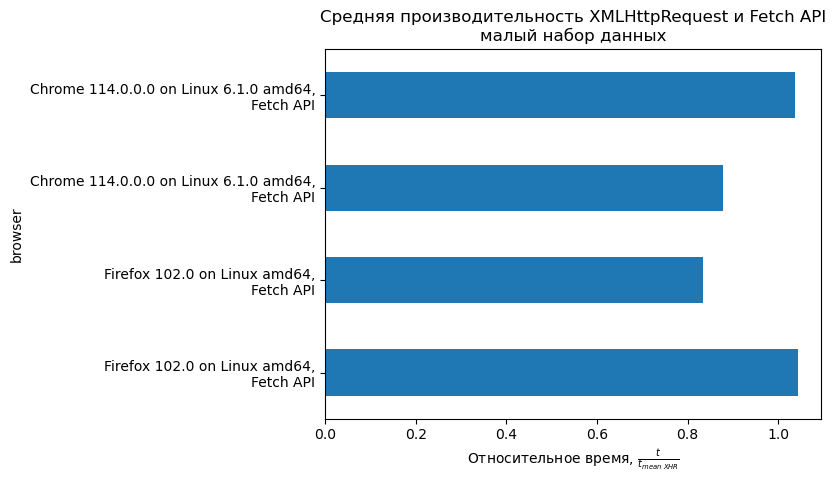

In [57]:
exp_small_rel_array = []

for ser, data in experimentTable[experimentTable.source == 'small.html'].groupby('series'):
    xhr_mean = data[data.type == 1]['mean'].iloc[0]
    
    data['min'] /= data[data.type == 1]['min'].iloc[0]
    data['mean'] /= data[data.type == 1]['mean'].iloc[0]
    data['max'] /= data[data.type == 1]['max'].iloc[0]
    data['median'] /= data[data.type == 1]['median'].iloc[0]
    
    exp_small_rel_array.append(data)

exp_small_rel = pd.concat(exp_small_rel_array).drop(columns=['series', 'iterations', 'experiment'])
exp_small_rel = exp_small_rel[exp_small_rel.type == 2]
esrt = exp_small_rel['type'].mask(lambda x: x==1, "XMLHttpRequest").mask(lambda x: x==2, "Fetch API")
exp_small_rel['browser'] += ',\n' + esrt
exp_small_rel = exp_small_rel.drop(columns=['source', 'type']).set_index('browser')
exp_small_rel['mean'].plot.barh(title='Средняя производительность XMLHttpRequest и Fetch API\nмалый набор данных', xlabel='Относительное время, $\\frac{t}{t_{mean\ XHR}}$')

<AxesSubplot: title={'center': 'Медианная производительность XMLHttpRequest и Fetch API\nмалый набор данных'}, xlabel='Относительное время, $\\frac{t}{t_{median\\ XHR}}$', ylabel='browser'>

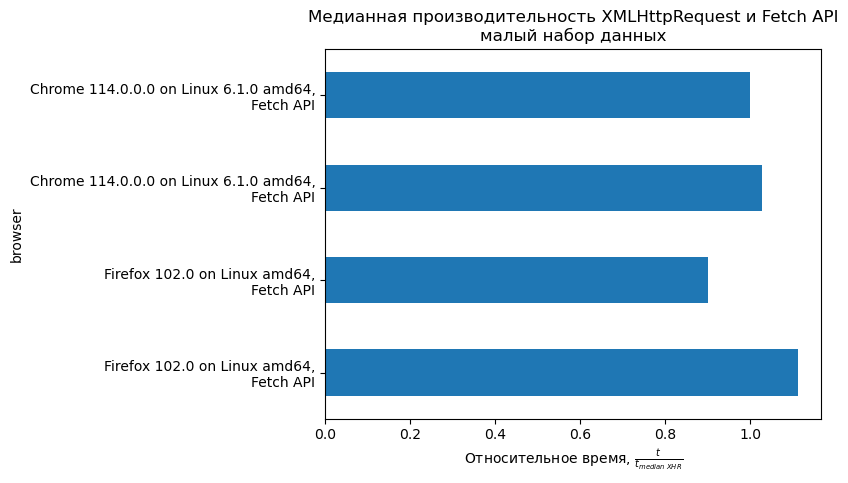

In [58]:
exp_small_rel['median'].plot.barh(title='Медианная производительность XMLHttpRequest и Fetch API\nмалый набор данных', xlabel='Относительное время, $\\frac{t}{t_{median\ XHR}}$')

<AxesSubplot: title={'center': 'Средняя производительность XMLHttpRequest и Fetch API\nбольшой набор данных'}, xlabel='Относительное время, $\\frac{t}{t_{mean\\ XHR}}$', ylabel='browser'>

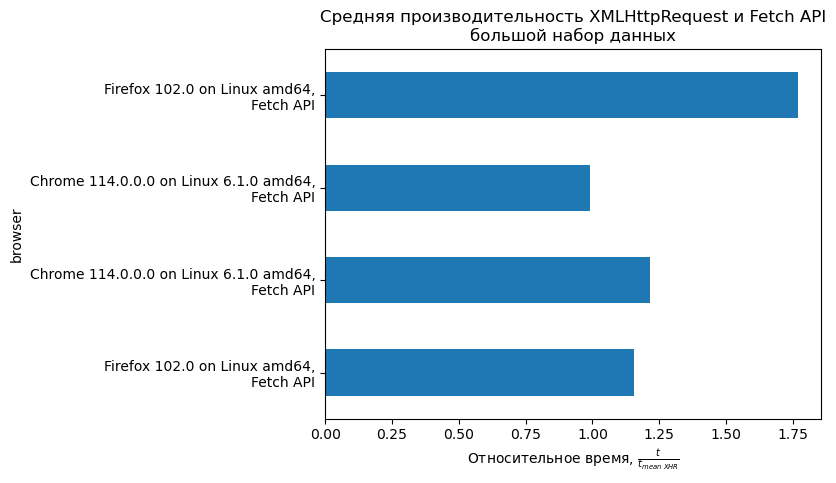

In [60]:
exp_big_rel_array = []

for ser, data in experimentTable[experimentTable.source == 'big.html'].groupby('series'):
    xhr_mean = data[data.type == 1]['mean'].iloc[0]
    
    data['min'] /= data[data.type == 1]['min'].iloc[0]
    data['mean'] /= data[data.type == 1]['mean'].iloc[0]
    data['max'] /= data[data.type == 1]['max'].iloc[0]
    data['median'] /= data[data.type == 1]['median'].iloc[0]
    
    exp_big_rel_array.append(data)

exp_big_rel = pd.concat(exp_big_rel_array).drop(columns=['series', 'iterations', 'experiment'])
exp_big_rel = exp_big_rel[exp_big_rel.type == 2]
ebrt = exp_big_rel['type'].mask(lambda x: x==1, "XMLHttpRequest").mask(lambda x: x==2, "Fetch API")
exp_big_rel['browser'] += ',\n' + ebrt
exp_big_rel = exp_big_rel.drop(columns=['source', 'type']).set_index('browser')
exp_big_rel['mean'].plot.barh(title='Средняя производительность XMLHttpRequest и Fetch API\nбольшой набор данных', xlabel='Относительное время, $\\frac{t}{t_{mean\ XHR}}$')

<AxesSubplot: title={'center': 'Средняя производительность XMLHttpRequest и Fetch API\nбольшой набор данных'}, xlabel='Относительное время, $\\frac{t}{t_{median\\ XHR}}$', ylabel='browser'>

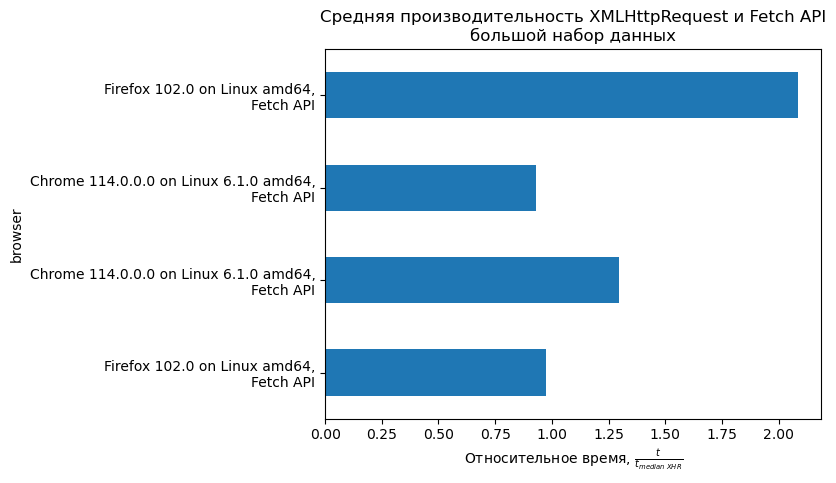

In [61]:
exp_big_rel['median'].plot.barh(title='Средняя производительность XMLHttpRequest и Fetch API\nбольшой набор данных', xlabel='Относительное время, $\\frac{t}{t_{median\ XHR}}$')